<a href="https://colab.research.google.com/github/lmw5153/normal_task/blob/main/pyjags.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,198 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123774 files and dire

In [ ]:
!sudo apt-get install jags #just another Gibbs sampling
!pip install pyjags

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,644 kB of archives.
After this operation, 3,492 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ jags 4.3.2-1.2204.0 [1,644 kB]
Fetched 1,644 kB in 0s (4,278 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 123634 files and directories curr

In [ ]:
import numpy as np
import pyjags
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
plt.rc('font', family='NanumBarunGothic')


In [ ]:
df = pd.read_csv("bustop.CSV",encoding = 'cp949')
#df2 = pd.read_csv("bustop_space.csv",encoding = 'cp949')

space = df.iloc[:,0].values
np.random.rand(10)
#passenger_z = (((df.iloc[:,1:].values.sum(axis=1).reshape(-1,5) / 45 +1/45)*100) ).round(0)#+ np.random.randn(107,5)*10).round(0)
passenger_x = df.iloc[:,1:].values.sum(axis=1).reshape(-1,5)[:,:4]
passenger_x2 = df.iloc[:,1:].values.sum(axis=1).reshape(-1,5)[:,4:]

passenger_z[0][0],passenger_x2.shape

(78.0, (107, 1))

In [ ]:
space_ = np.arange(1,passenger_x.shape[0]+1)
distance = cdist(space_.reshape(-1,1),space_.reshape(-1,1))
adj = np.array(distance ==1)*1


rho = 0.5
tau = 1

D = np.diag(np.sum(adj, axis=1))
Q = tau * (D - rho * adj + 1e-4 * np.eye(len(space_)))


#x_var = (passenger - passenger.mean(axis=1, keepdims=True)) / passenger.std(axis=1, keepdims=True)
#x에 대한 공변량으로 인구밀도를 제안
#minmax = MinMaxScaler()
#x_var =minmax.fit_transform(passenger_x)
x_var.shape, passenger_z.shape, Q.shape

((107, 5), (107, 5), (107, 107))

In [ ]:
data_jags = {
    'x_var': passenger_x,
    'z': passenger_x2,
    'space': passenger_x2.shape[0],
    'time': passenger_x2.shape[1],
    'mu': np.zeros(len(space_)),
    'Q': Q
}

# 모델 정의
model_string = """
model {
  for(s_i in 1:space){
    for(t_i in 1:time){
      lambda[s_i,t_i] <- exp(a[1] + x_var[s_i,t_i]*a[2] + theta[s_i] + phi[s_i])
      z[s_i,t_i] ~ dpois(lambda[s_i, t_i])
    }
  }
  for(j in 1:space){
    theta[j] ~ dnorm(0, 0.00010)
  }
  for(i in 1:2){
    a[i] ~ dnorm(0, 0.00010)
  }
  phi[1:space] ~ dmnorm(mu[1:space], Q[1:space,1:space])
}
"""

parameters = ["a", "theta", "phi", "lambda"]

adaptSteps = 500
burnInSteps = 2000
nChains = 7
thinSteps = 2
numSavedSteps = 2000
nIter = int(np.ceil((numSavedSteps * thinSteps) / nChains))

#start_time = time.time()

model = pyjags.Model(
    code=model_string,
    data=data_jags,
    chains=nChains,
    adapt=adaptSteps
)

model.update(burnInSteps)
samples = model.sample(nIter, vars=parameters, thin=thinSteps)

#end_time = time.time()
#elapsed = end_time - start_time
print("MCMC sampling completed in:")

adapting: iterations 1498 of 3500, elapsed 0:00:05, remaining 0:00:07
adapting: iterations 2989 of 3500, elapsed 0:00:14, remaining 0:00:02
adapting: iterations 3500 of 3500, elapsed 0:00:17, remaining 0:00:00
updating: iterations 1771 of 14000, elapsed 0:00:14, remaining 0:01:33
updating: iterations 2422 of 14000, elapsed 0:00:19, remaining 0:01:32
updating: iterations 3052 of 14000, elapsed 0:00:27, remaining 0:01:36
updating: iterations 4207 of 14000, elapsed 0:00:35, remaining 0:01:21
updating: iterations 4809 of 14000, elapsed 0:00:42, remaining 0:01:20
updating: iterations 5957 of 14000, elapsed 0:00:50, remaining 0:01:07
updating: iterations 6552 of 14000, elapsed 0:00:57, remaining 0:01:05
updating: iterations 7693 of 14000, elapsed 0:01:05, remaining 0:00:54
updating: iterations 8281 of 14000, elapsed 0:01:13, remaining 0:00:50
updating: iterations 9415 of 14000, elapsed 0:01:21, remaining 0:00:39
updating: iterations 9996 of 14000, elapsed 0:01:27, remaining 0:00:35
updating:

In [ ]:
space[:107].shape

(107,)

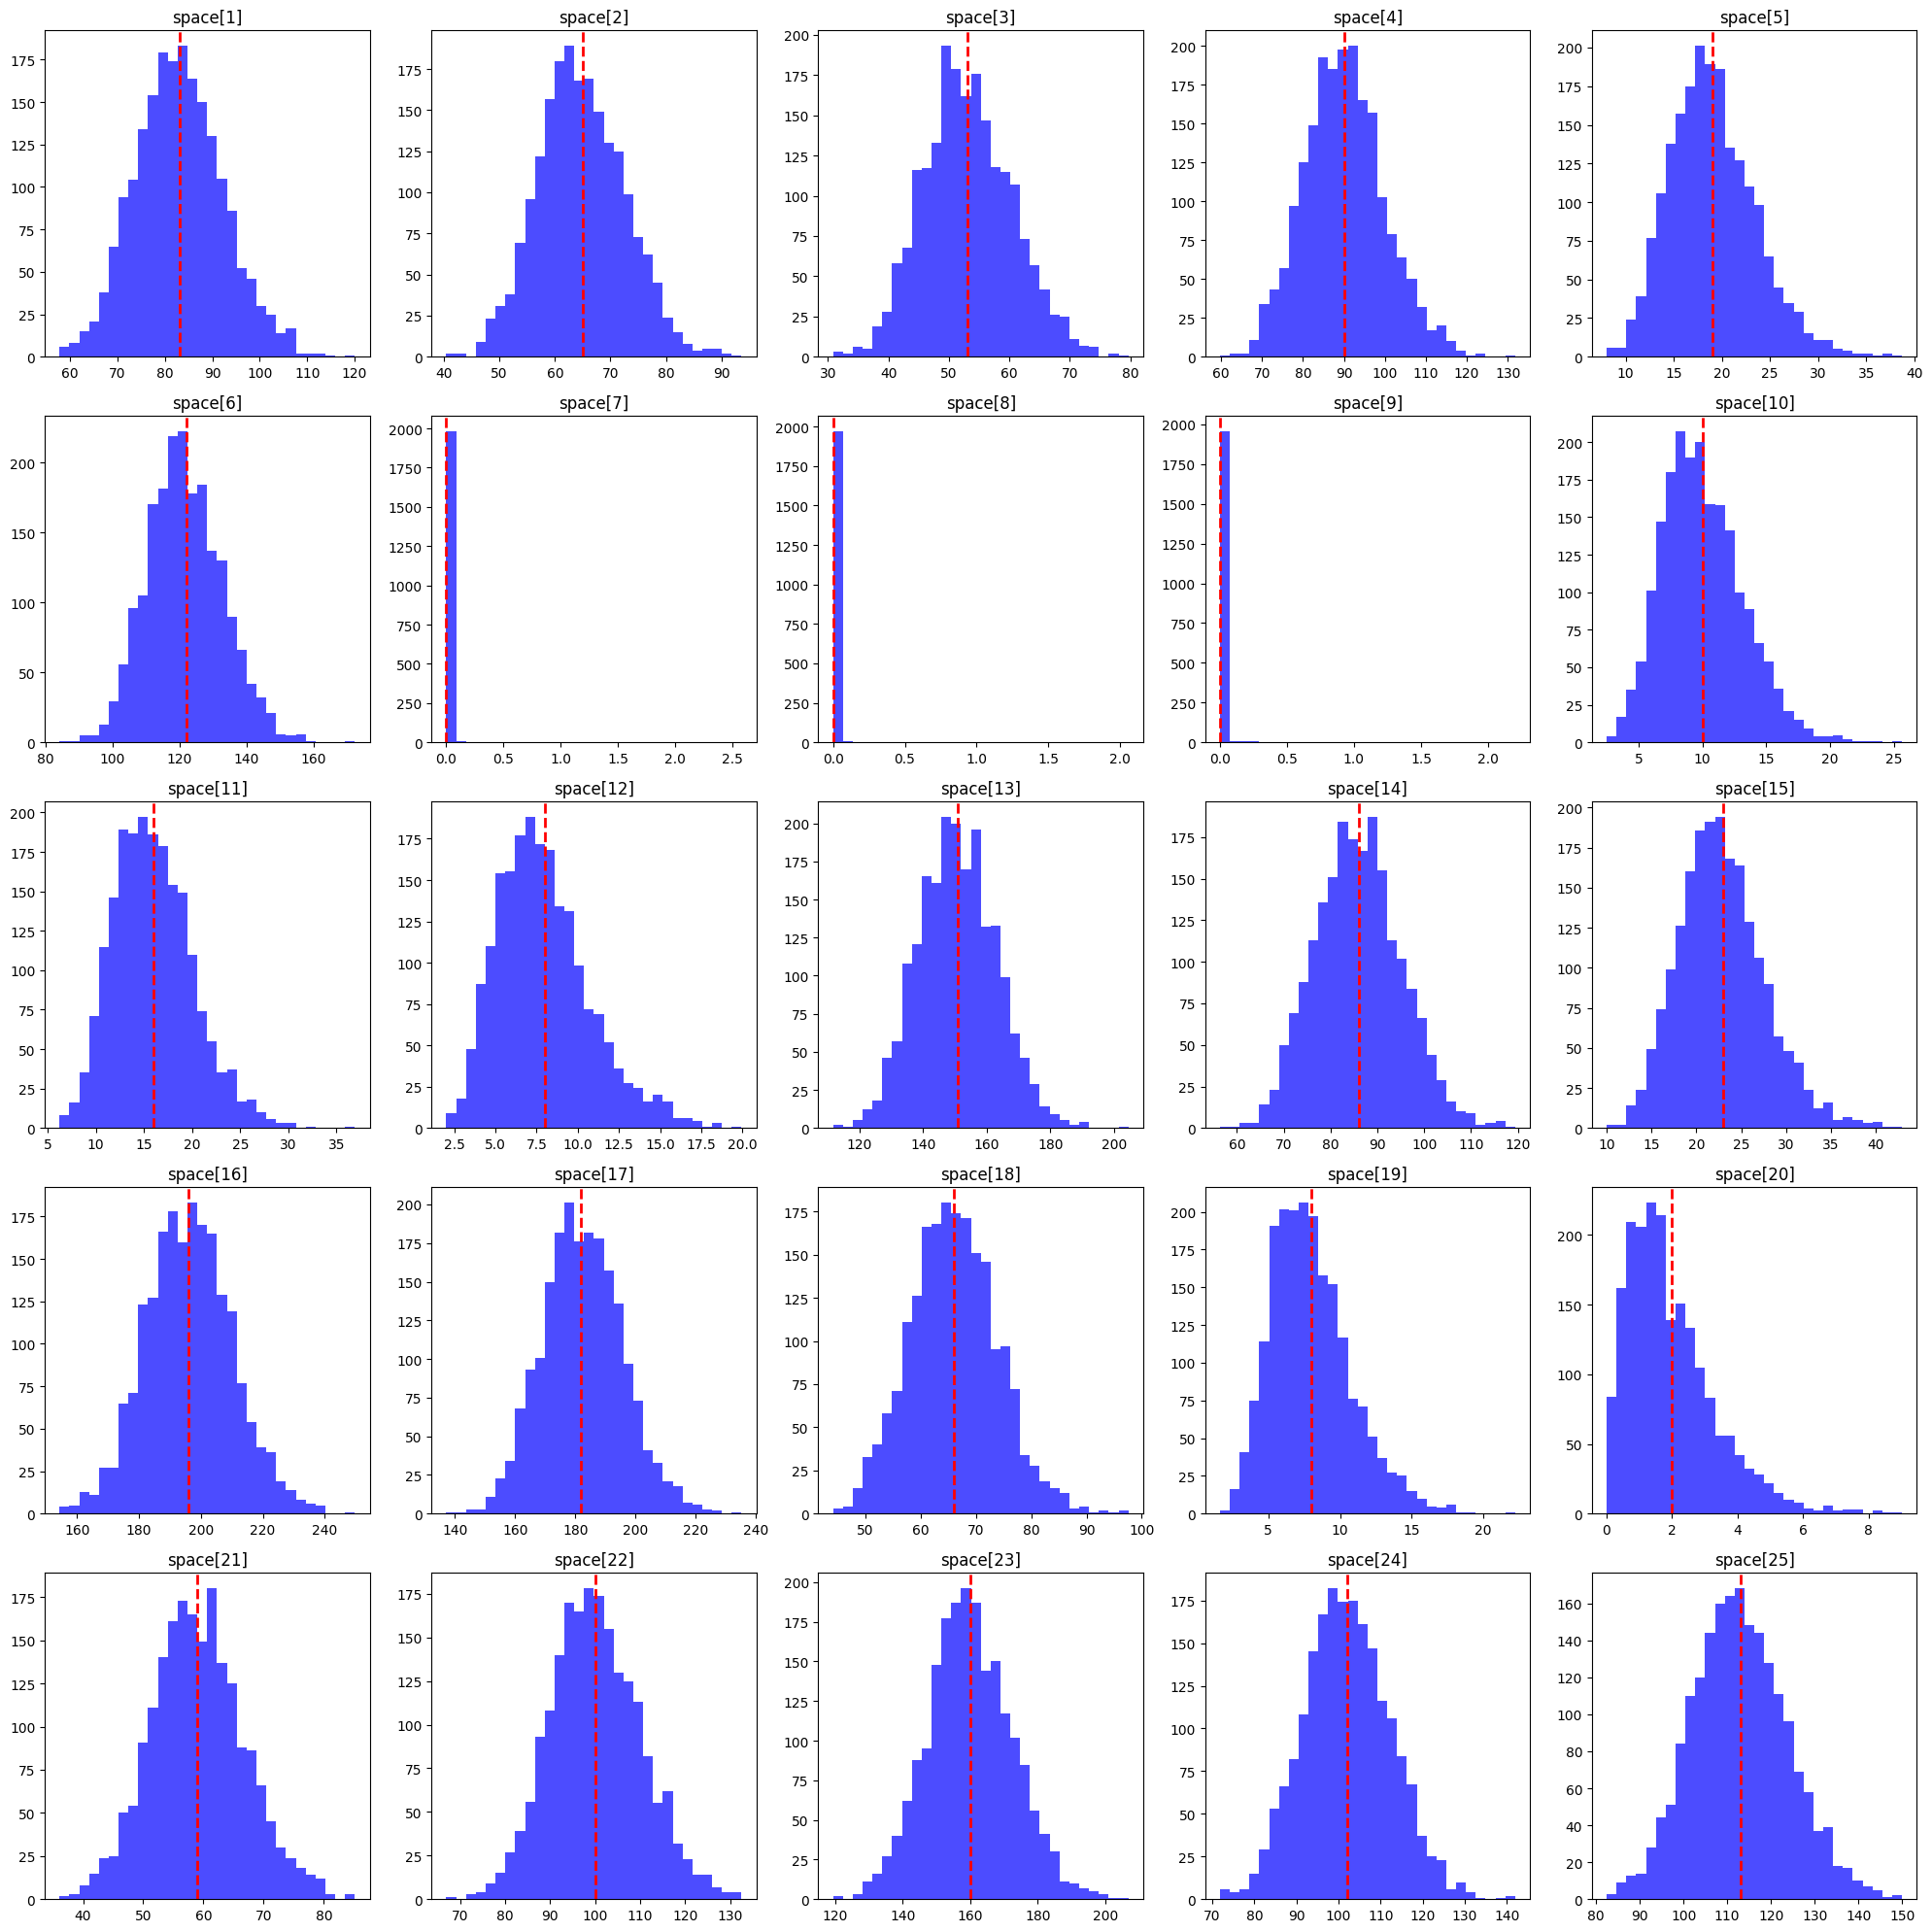

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# 5 × 5 = 25개의 서브플롯 생성
for i in range(25):
    # N 값은 1부터 25까지
    N = i + 1

    # 서브플롯의 행(row), 열(col) 위치 계산
    row = i // 5
    col = i % 5

    # 해당 서브플롯 액세스
    ax = axes[row, col]

    # 히스토그램 그리기
    ax.hist(samples['lambda'][N].flatten(), bins=30, alpha=0.7, color='blue')

    # 수직선 그리기
    ax.axvline(passenger_x2[N], color='red', linestyle='--', linewidth=2)

    # 제목, 범례 등 설정
    ax.set_title(f'space[{N}]')
   # ax.legend()

plt.tight_layout()
plt.savefig("poterior.png")
plt.show()



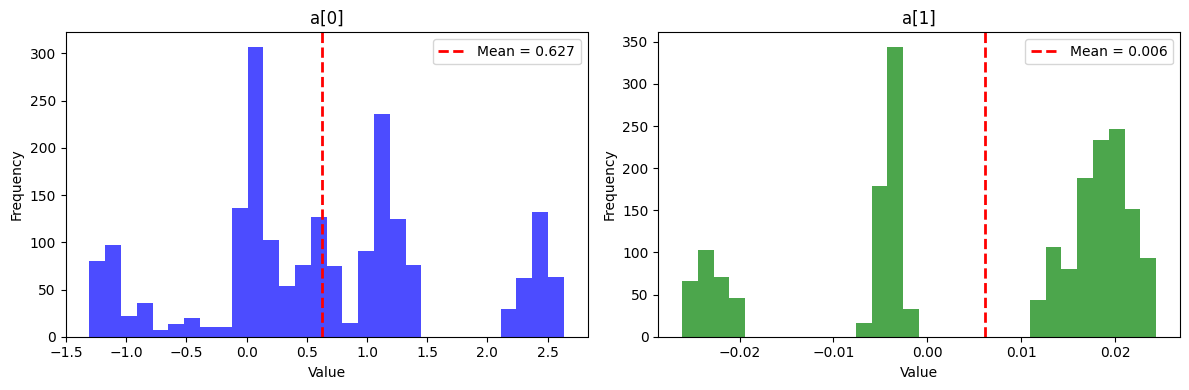

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# a[0] 데이터
a0_data = samples['a'][0].flatten()
a0_mean = np.mean(a0_data)

axes[0].hist(a0_data, bins=30, alpha=0.7, color='blue')
axes[0].axvline(a0_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {a0_mean:.3f}')
axes[0].set_title('a[0]')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# a[1] 데이터
a1_data = samples['a'][1].flatten()
a1_mean = np.mean(a1_data)

axes[1].hist(a1_data, bins=30, alpha=0.7, color='green')
axes[1].axvline(a1_mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {a1_mean:.3f}')
axes[1].set_title('a[1]')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.savefig("a.png")
plt.show()


In [ ]:
np.array([samples['phi'][i].mean() for i in range(107)])

array([ 0.1500357 ,  0.0707469 ,  0.07884739,  0.044619  ,  0.13923951,
        0.07199127, -0.03867705, -0.09263594, -0.11012527, -0.04211801,
       -0.07502882, -0.02804193, -0.06505388, -0.02839099, -0.12060003,
       -0.04796871,  0.13917875,  0.12807941,  0.17304785, -0.11198981,
       -0.0854652 , -0.2826892 , -0.06616955, -0.03537213,  0.00283382,
        0.10916997, -0.01512407,  0.09512227, -0.03937493, -0.22917415,
        0.09159994, -0.02998408,  0.02232462,  0.17427568,  0.2528997 ,
        0.08432736,  0.03718621,  0.16969127, -0.00755737,  0.05643681,
       -0.08837066, -0.08393792,  0.15502685, -0.03500006, -0.050327  ,
       -0.13760527, -0.12612626, -0.10420707,  0.00144284, -0.17514815,
       -0.05979253, -0.19670663, -0.16946722,  0.15625955, -0.14179628,
        0.04704456, -0.06789381,  0.19113464,  0.21766058, -0.09686193,
       -0.02804821, -0.20330641, -0.06927125,  0.05588304, -0.22566911,
        0.05684658, -0.04683093, -0.24567339,  0.06436961,  0.07

In [ ]:
import numpy as np

# 예시: space라는 어레이가 있고, 길이는 107이라고 가정
# space = np.array([...])  # 사용자 코드에서 실제 선언되어 있다고 가정
space_[:107]
# 1) phi 평균값을 담은 배열 생성
arr = np.array([samples['phi'][i].mean() for i in range(107)])

# 2) 평균값 오름차순 정렬 시의 인덱스
sorted_indices = np.argsort(arr)

# 3) 가장 낮은 평균 5개
lowest_indices = sorted_indices[:10]
lowest_values = arr[lowest_indices]
lowest_space = space[:107][lowest_indices]  # space 배열에서 해당 인덱스를 뽑아옴

# 4) 가장 높은 평균 5개
highest_indices = sorted_indices[-10:]
highest_values = arr[highest_indices]
highest_space = space[:107][highest_indices]  # space 배열에서 해당 인덱스를 뽑아옴

# 5) 결과 출력
print("가장 낮은 평균 5개:")
for idx, val, sp in zip(lowest_indices, lowest_values, lowest_space):
    print(f"Index: {idx}, Mean: {val:.4f}, Space: {sp}")

print("\n가장 높은 평균 5개:")
for idx, val, sp in zip(highest_indices, highest_values, highest_space):
    print(f"Index: {idx}, Mean: {val:.4f}, Space: {sp}")



가장 낮은 평균 5개:
Index: 21, Mean: -0.2827, Space: 중앙시장.중앙성당.방송대
Index: 75, Mean: -0.2703, Space: 장승백이
Index: 104, Mean: -0.2481, Space: 에코스위첸
Index: 67, Mean: -0.2457, Space: 평화그린1차아파트
Index: 29, Mean: -0.2292, Space: 서서학우정목련아파트
Index: 64, Mean: -0.2257, Space: 평화신기마을
Index: 61, Mean: -0.2033, Space: 원석구마을
Index: 51, Mean: -0.1967, Space: 전북도립미술관
Index: 49, Mean: -0.1751, Space: 전북도립미술관입구
Index: 52, Mean: -0.1695, Space: 전북도립미술관입구

가장 높은 평균 5개:
Index: 37, Mean: 0.1697, Space: 평화골드클래스.그린1차아파트
Index: 18, Mean: 0.1730, Space: 고속터미널입구.금암1동주민센터
Index: 33, Mean: 0.1743, Space: 꽃밭정이네거리
Index: 101, Mean: 0.1839, Space: 에코휴먼빌
Index: 57, Mean: 0.1911, Space: 왕벚꽃마을
Index: 58, Mean: 0.2177, Space: 두현마을
Index: 79, Mean: 0.2361, Space: 서학예술마을.전주교대입구
Index: 71, Mean: 0.2521, Space: 평화코오롱아파트
Index: 34, Mean: 0.2529, Space: 평화코오롱아파트
Index: 83, Mean: 0.2817, Space: CTS전북방송


In [ ]:
passenger_x[highest_indices] ,passenger_x[lowest_indices] ,

(array([[ 17,  29,  31,  20],
        [ 85,  41,  15,  40],
        [117,  22,  56,  44],
        [  6,   7,   6,  10],
        [ 49,  52,  58,  24]]),
 array([[  1,  15,  38,  44],
        [  7,   4, 155,   5],
        [ 36,  34,  71,  25],
        [ 56,  29,  28, 101],
        [  6,   0,   1,   1]]))

In [ ]:
import numpy as np

# 예시: space라는 어레이가 있고, 길이는 107이라고 가정
# space = np.array([...])  # 사용자 코드에서 실제 선언되어 있다고 가정
space_[:107]
# 1) phi 평균값을 담은 배열 생성
arr = np.array([samples['theta'][i].mean() for i in range(107)])

# 2) 평균값 오름차순 정렬 시의 인덱스
sorted_indices = np.argsort(arr)

# 3) 가장 낮은 평균 5개
lowest_indices = sorted_indices[:10]
lowest_values = arr[lowest_indices]
lowest_space = space[:107][lowest_indices]  # space 배열에서 해당 인덱스를 뽑아옴

# 4) 가장 높은 평균 5개
highest_indices = sorted_indices[-10:]
highest_values = arr[highest_indices]
highest_space = space[:107][highest_indices]  # space 배열에서 해당 인덱스를 뽑아옴

# 5) 결과 출력
print("가장 낮은 평균 5개:")
for idx, val, sp in zip(lowest_indices, lowest_values, lowest_space):
    print(f"Index: {idx}, Mean: {val:.4f}, Space: {sp}")

print("\n가장 높은 평균 5개:")
for idx, val, sp in zip(highest_indices, highest_values, highest_space):
    print(f"Index: {idx}, Mean: {val:.4f}, Space: {sp}")


가장 낮은 평균 5개:
Index: 51, Mean: -82.8568, Space: 전북도립미술관
Index: 73, Mean: -82.4473, Space: 완산여고
Index: 30, Mean: -82.3714, Space: 장승백이
Index: 9, Mean: -81.3082, Space: 송천현대아파트
Index: 7, Mean: -79.8819, Space: 에코시티상가
Index: 71, Mean: -79.8039, Space: 평화코오롱아파트
Index: 8, Mean: -79.5150, Space: 송천주공아파트
Index: 52, Mean: -78.7536, Space: 전북도립미술관입구
Index: 84, Mean: -78.6789, Space: 중앙시장.세이브존
Index: 93, Mean: -1.4072, Space: 송천1동주민센터

가장 높은 평균 5개:
Index: 44, Mean: 4.0463, Space: 왕벚꽃마을
Index: 23, Mean: 4.0572, Space: 팔달로예술회관
Index: 6, Mean: 4.0931, Space: 에코데시앙4블럭
Index: 56, Mean: 4.1020, Space: 구이중
Index: 17, Mean: 4.1423, Space: 전북대학교.한나여성병원앞
Index: 16, Mean: 4.2898, Space: 기린대로덕진공원
Index: 95, Mean: 4.2996, Space: 송북초교
Index: 13, Mean: 4.3835, Space: 송천삼거리롯데마트
Index: 80, Mean: 4.3899, Space: 남부시장
Index: 96, Mean: 4.6697, Space: 송천주공2단지


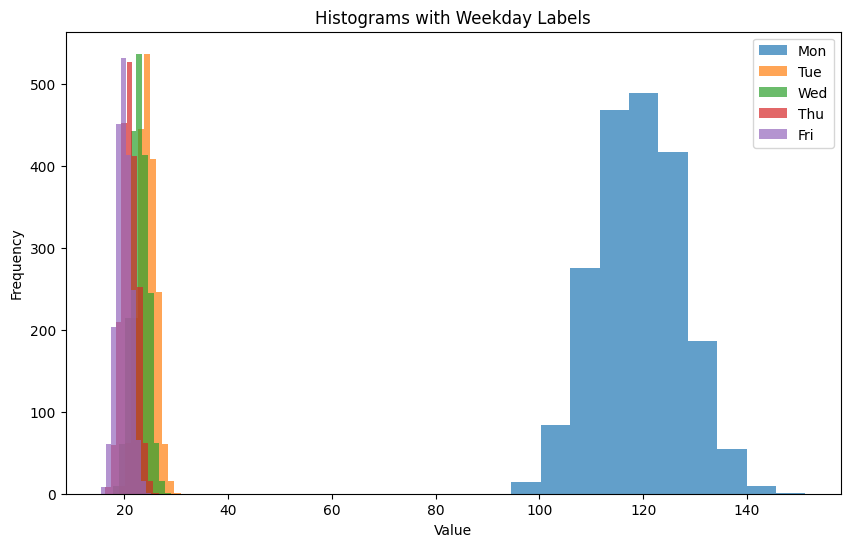

In [ ]:

plt.figure(figsize=(10, 6))

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']  # 범례 이름

for i in range(5):
    flattened_data = samples['lambda'][53][i].flatten()  # 샘플 데이터에서 적절한 값 선택
    plt.hist(flattened_data, bins=10, alpha=0.7, label=days[i])

# 그래프 설정
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histograms with Weekday Labels")
plt.legend()
plt.show()

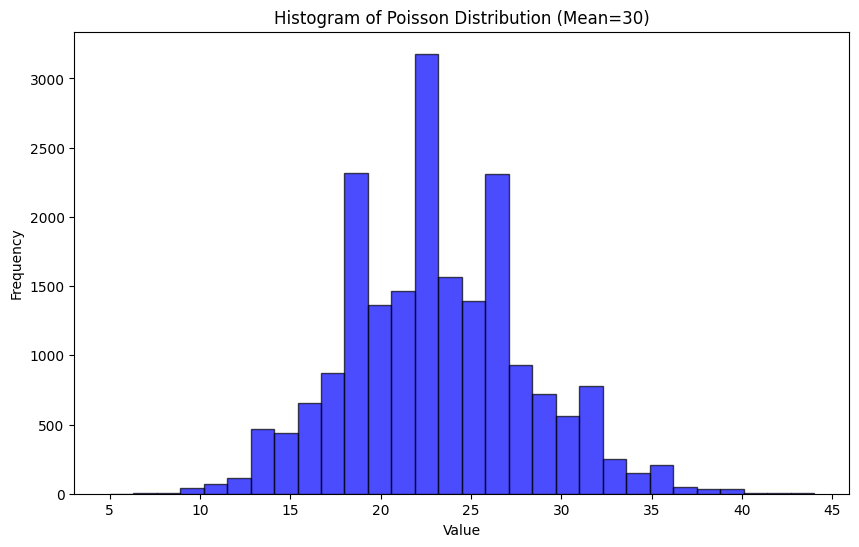

In [ ]:
plt.figure(figsize=(10, 6))
poisson_data=np.array([np.random.poisson(lam=samples['lambda'][53][-3].flatten()[i], size=100) for i in range(200)]).flatten()

plt.hist(poisson_data, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Poisson Distribution (Mean=30)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

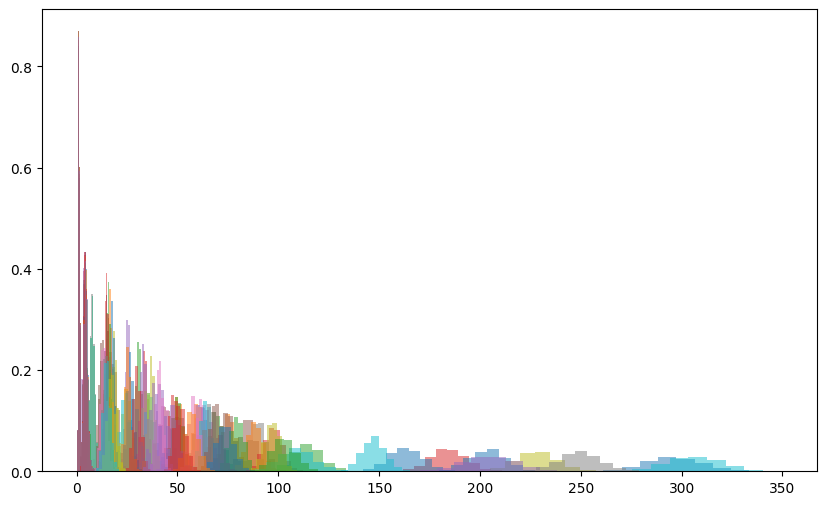

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(82,101):
  for j in range(5):
      flattened_data = samples['lambda'][i][j].flatten()
      plt.hist(flattened_data, bins=10, density=True, alpha=0.5)